In [884]:
import numpy as np
import matplotlib.pyplot as plt

### **Solving 1-D Schrodinger Equation with Python**

Potential function of the Schrodinger Equation is plotted from range of -10 to 10:

$$V(x)=\frac{\hbar^2}{2m} \alpha^2 \lambda(\lambda-1)\left(\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right)$$

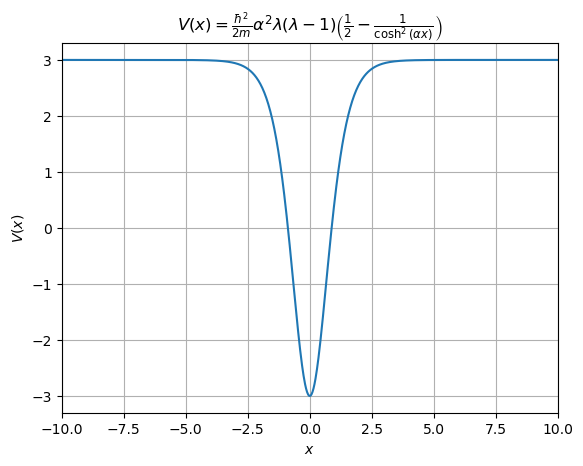

In [885]:
# Constants
hbar = 1
m = 1
alpha = 1
lmbda = 4

# Define the potential V(x)
def V(x):
    return (hbar**2 / (2 * m)) * alpha**2 * lmbda * (lmbda - 1) * (0.5 - 1 / (np.cosh(alpha * x)**2))

x = np.linspace(-10,10,1000)

plt.plot(x, V(x))
plt.grid(True)
plt.xlim(-10, 10)
plt.title(r'$V(x)=\frac{\hbar^2}{2m} \alpha^2 \lambda(\lambda-1)\left(\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right)$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.show()

# **Find eigenvalues**

Four eigenvalues are calculated:

$$E_n = \frac{\hbar^2}{2m}\alpha^2\left[\frac{\lambda(\lambda - 1)}{2} - (\lambda - 1 - n)^2\right]$$


In [897]:
n = 4

def E(n):
    return (hbar**2 / (2 * m)) * alpha**2 * ((lmbda * (lmbda - 1)) / 2 - (lmbda - 1 - n)**2)

E_n = []

for i in range(n):
    E_n.append(E(i))

print('Eigenvalues:')

for values in E_n:
    print(values)

Eigenvalues:
-1.5
1.0
2.5
3.0


## Root Finding

Roots of each wavefunction are obtained by iterating through bisection methods

In [887]:
# Function to calculate turning point
def f_turn(x, E_n, i):
    return E_n[i] - V(x)

# Bisection method implementation
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("The bisection method requires the function to have opposite signs at the endpoints.")

    iteration = 0
    while (b - a) / 2 > tol and iteration < max_iter:
        c = (a + b) / 2  # Midpoint of the interval
        fc = f(c)

        if fc == 0 or (b - a) / 2 < tol:
            return c
        elif f(a) * fc < 0:
            b = c
        else:
            a = c
        
        iteration += 1

    if iteration == max_iter:
        raise ValueError("Bisection method did not converge within the maximum number of iterations.")

    return (a + b) / 2

# Function to store values with roots
def find_valid_energies(E_n, roots):
    valid_energies = []
    for i, (left, right) in enumerate(roots):
        if left is not None and right is not None:
            valid_energies.append(E_n[i])
    return valid_energies

# Loop over E_n to find roots
n = len(E_n)
roots = []

for i in range(n):
    # Define the specific function for this energy level
    f = lambda x: f_turn(x, E_n, i)
    
    try:
        root_right = bisection_method(f, a=0, b=10, tol=1e-15, max_iter=100)
        root_left = -root_right  # Assuming symmetry
        roots.append((root_left, root_right))
        print(f"E_n[{i + 1}] = {E_n[i]:.2f} -> Root left: {root_left:.6f}, Root right: {root_right:.6f}")
    except ValueError as e:
        print(f"E_n[{i}] = {E_n[i]:.2f} -> No roots found: {e}")

# Find valid energy levels
valid_energies = find_valid_energies(E_n, roots)
print("\nValid energies with roots:")
print(valid_energies)
#print(roots)


E_n[1] = -1.50 -> Root left: -0.549306, Root right: 0.549306
E_n[2] = 1.00 -> Root left: -1.146216, Root right: 1.146216
E_n[3] = 2.50 -> Root left: -1.914084, Root right: 1.914084
E_n[3] = 3.00 -> No roots found: The bisection method requires the function to have opposite signs at the endpoints.

Valid energies with roots:
[-1.5, 1.0, 2.5]
[(-0.5493061443340547, 0.5493061443340547), (-1.1462158347805889, 1.1462158347805889), (-1.9140842356665506, 1.9140842356665506)]


### *Checking whether does roots of potential intersect with the energy level*

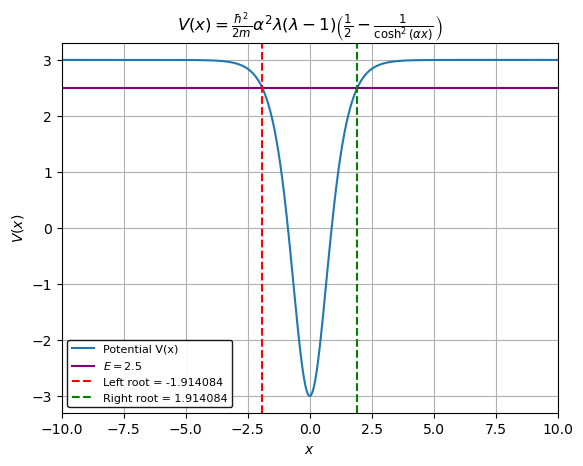

In [888]:
plt.plot(x, V(x), label='Potential V(x)')
plt.plot(x, [valid_energies[2]] * len(x), color='purple', label=f'$E = {valid_energies[2]}$')
plt.axvline(roots[2][0], linestyle='--', color='red', label=f'Left root = {roots[2][0]:.6f}')
plt.axvline(roots[2][1], linestyle='--', color='green', label=f'Right root = {roots[2][1]:.6f}')
plt.grid(True)
plt.xlim(-10, 10)
plt.title(r'$V(x)=\frac{\hbar^2}{2m} \alpha^2 \lambda(\lambda-1)\left(\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right)$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.legend(
    fontsize=8,                   # Set font size
    loc='lower left',             # Place legend in the lower left
    frameon=True,                 # Enable legend box
    framealpha=0.9,               # Make legend box slightly transparent
    edgecolor='black'             # Add black border to the legend box
)

plt.show()


### *Defining turning points and boundaries to be use in numerov method later*

In [889]:
# Parameters
n = 10000  # Number of steps

# Array to store results
results = []

# Iterate through each pair of roots
for i, (root_left, root_right) in enumerate(roots):
    # Midpoint and width
    mid_point = (root_right + root_left) / 2
    width = (root_right - root_left)

    # x infinity boundaries
    x_left_inf = mid_point - 10 * width
    x_right_inf = mid_point + 10 * width

    # y infinity boundaries (not used further in this context)
    y_left_inf, y_right_inf = 0, 0

    # Step size
    dx = (x_right_inf - x_left_inf) / n

    # Turning points
    x_left_turn_1 = root_left + dx
    x_left_turn_2 = root_left - dx
    x_right_turn_1 = root_right + dx
    x_right_turn_2 = root_right - dx

    # Store results in a dictionary
    result = {
        'x_left_inf': x_left_inf,
        'x_right_inf': x_right_inf,
        'dx': dx,
        'x_left_turn_1': x_left_turn_1,
        'x_left_turn_2': x_left_turn_2,
        'x_right_turn_1': x_right_turn_1,
        'x_right_turn_2': x_right_turn_2
    }
    results.append(result)

# Print the stored results for verification
for i, res in enumerate(results):
    print(f"Root pair {i + 1} results:")
    print(res)


Root pair 1 results:
{'x_left_inf': -10.986122886681093, 'x_right_inf': 10.986122886681093, 'dx': 0.0021972245773362186, 'x_left_turn_1': -0.5471089197567185, 'x_left_turn_2': -0.5515033689113908, 'x_right_turn_1': 0.5515033689113908, 'x_right_turn_2': 0.5471089197567185}
Root pair 2 results:
{'x_left_inf': -22.92431669561178, 'x_right_inf': 22.92431669561178, 'dx': 0.004584863339122356, 'x_left_turn_1': -1.1416309714414665, 'x_left_turn_2': -1.1508006981197112, 'x_right_turn_1': 1.1508006981197112, 'x_right_turn_2': 1.1416309714414665}
Root pair 3 results:
{'x_left_inf': -38.28168471333101, 'x_right_inf': 38.28168471333101, 'dx': 0.007656336942666202, 'x_left_turn_1': -1.9064278987238845, 'x_left_turn_2': -1.9217405726092167, 'x_right_turn_1': 1.9217405726092167, 'x_right_turn_2': 1.9064278987238845}


## *Use numerov method to find wavefunction*

Wavefunction of each eigenvalues are iterated from left boundary to right turning point and right boundary to left turning point by using numerov method.
Only one example of eigenvalue is plotted at this point.

Wavefunction set 1:
  Energy: -1.500000
  x_left_1: 0.549306562693646 ...
  x_right_1: -0.549306562693646 ...
  y_left_1: 127478.6540051532 ...
  y_right_1: 127478.6540051532 ...
Wavefunction set 2:
  Energy: 1.000000
  x_left_1: 1.146216707755329 ...
  x_right_1: -1.146216707755329 ...
  y_left_1: -30488123728.261425 ...
  y_right_1: -30488123728.261425 ...
Wavefunction set 3:
  Energy: 2.500000
  x_left_1: 1.9140856934610966 ...
  x_right_1: -1.9140856934610966 ...
  y_left_1: 35807657.46984809 ...
  y_right_1: 35807657.46984809 ...


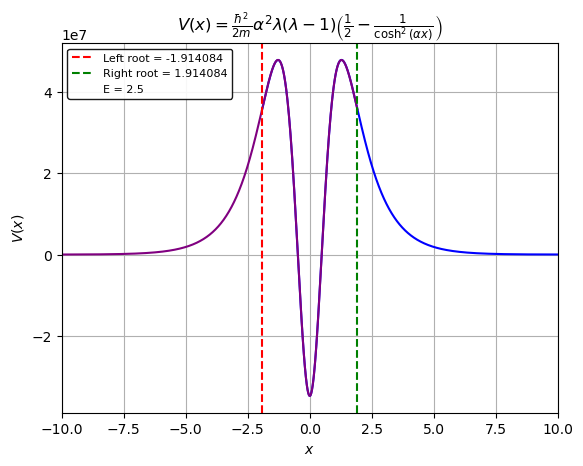

In [890]:
# Numerov method implementation
def numerov(x, dx, E):
    n = len(x) - 2
    psi = np.zeros(n + 2)
    
    # Initial conditions
    psi[0] = 0  # Boundary condition: wavefunction vanishes at -inf
    psi[1] = 1e-10  # Small initial value
    
    # Numerov's method iteration
    for i in range(1, n + 1):
        k2 = -2 * m / hbar**2 * (E - V(x[i]))
        psi[i + 1] = (psi[i] * (2 + 10 / 12 * dx**2 * k2) - 
                      psi[i - 1] * (1 - dx**2 / 12 * k2)) / (1 - dx**2 / 12 * k2)
    
    return psi

# Loop through each set of results
all_wavefunctions = []  # To store wavefunctions for all 

for res_idx, res in enumerate(results):
    # Extract values from results
    x_left_inf = res['x_left_inf']
    x_right_inf = res['x_right_inf']
    dx = res['dx']
    x_left_turn_1 = res['x_left_turn_1']
    x_left_turn_2 = res['x_left_turn_2']
    x_right_turn_1 = res['x_right_turn_1']
    x_right_turn_2 = res['x_right_turn_2']

    # Calculate the number of points
    n = int((x_right_turn_1 - x_left_inf) / dx)
    
    # Define x arrays
    x_left_1 = np.linspace(x_left_inf, x_right_turn_1, n + 2)
    x_right_1 = np.linspace(x_right_inf, x_left_turn_2, n + 2)
    
    # Compute wavefunctions for a specific energy level
    E = valid_energies[res_idx % len(valid_energies)]  # Example: cycle through energies
    y_left_1 = numerov(x_left_1, dx, E)
    y_right_1 = numerov(x_right_1, dx, E)

    # Store wavefunctions and x values
    all_wavefunctions.append({
        'x_left_1': x_left_1,
        'x_right_1': x_right_1,
        'y_left_1': y_left_1,
        'y_right_1': y_right_1,
        'energy': E
    })

# Debugging: Print or inspect one of the computed wavefunctions
for idx, wf in enumerate(all_wavefunctions):
    print(f"Wavefunction set {idx + 1}:")
    print(f"  Energy: {wf['energy']:.6f}")
    print(f"  x_left_1: {wf['x_left_1'][-2]} ...")   
    print(f"  x_right_1: {wf['x_right_1'][-2]} ...")  
    print(f"  y_left_1: {wf['y_left_1'][-2]} ...")   
    print(f"  y_right_1: {wf['y_right_1'][-2]} ...")  

# Example plot for E = 2.5
plt.plot(all_wavefunctions[2]['x_right_1'], all_wavefunctions[2]['y_right_1'], color = 'blue')
plt.plot(all_wavefunctions[2]['x_left_1'], all_wavefunctions[2]['y_left_1'], color = 'purple')
plt.axvline(roots[2][0], linestyle='--', color='red', label=f'Left root = {roots[2][0]:.6f}')
plt.axvline(roots[2][1], linestyle='--', color='green', label=f'Right root = {roots[2][1]:.6f}')
plt.plot(0, color = 'white', label = f'E = {valid_energies[2]}')
plt.grid(True)
plt.xlim(-10, 10)
plt.title(r'$V(x)=\frac{\hbar^2}{2m} \alpha^2 \lambda(\lambda-1)\left(\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right)$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.legend(
    fontsize=8,                   # Set font size
    loc='upper left',             # Place legend in the lower left
    frameon=True,                 # Enable legend box
    framealpha=0.9,               # Make legend box slightly transparent
    edgecolor='black'             # Add black border to the legend box
)

plt.show()

Wavefunctions are iterated from left boundary to left turning point and right boundary to right turning point for further use in three point formula later.

Wavefunction set 1:
  Energy: -1.500000
  x_left_2: -0.5493056819551452 ...
  x_right_2: 0.5493056819551452 ...
  y_left_2: 127606.87421506613 ...
  y_right_2: 127606.87421506613 ...
Wavefunction set 2:
  Energy: 1.000000
  x_left_2: -1.1462148699524413 ...
  x_right_2: 1.1462148699524413 ...
  y_left_2: 30557995368.45269 ...
  y_right_2: 30557995368.45269 ...
Wavefunction set 3:
  Energy: 2.500000
  x_left_2: -1.9140826244845357 ...
  x_right_2: 1.9140826244845357 ...
  y_left_2: 35923981.702894315 ...
  y_right_2: 35923981.702894315 ...


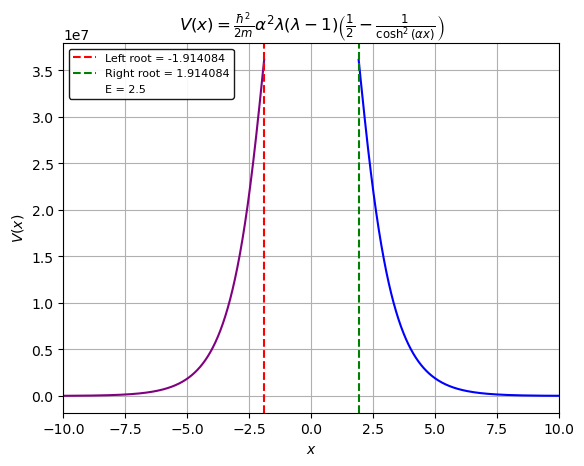

In [891]:
all_wavefunctions_2 = []  # To store wavefunctions for all results
for res_idx, res in enumerate(results):
    # Extract values from results
    x_left_inf = res['x_left_inf']
    x_right_inf = res['x_right_inf']
    dx = res['dx']
    x_left_turn_1 = res['x_left_turn_1']
    x_right_turn_2 = res['x_right_turn_2']
    
    # Calculate the number of points
    n = int((x_left_turn_1 - x_left_inf) / dx)
    
    # Define x arrays
    x_left_2 = np.linspace(x_left_inf, x_left_turn_1, n + 2)
    x_right_2 = np.linspace(x_right_inf, x_right_turn_2, n + 2)
    
    # Compute wavefunctions for a specific energy level
    E = valid_energies[res_idx % len(valid_energies)]  # Example: cycle through energies
    y_left_2 = numerov(x_left_2, dx, E)
    y_right_2 = numerov(x_right_2, dx, E)

    # Store wavefunctions and x values
    all_wavefunctions_2.append({
        'x_left_2': x_left_2,
        'x_right_2': x_right_2,
        'y_left_2': y_left_2,
        'y_right_2': y_right_2,
        'energy': E
    })

# Debugging: Print or inspect one of the computed wavefunctions
for idx, wf in enumerate(all_wavefunctions_2):
    print(f"Wavefunction set {idx + 1}:")
    print(f"  Energy: {wf['energy']:.6f}")
    print(f"  x_left_2: {wf['x_left_2'][-2]} ...")   
    print(f"  x_right_2: {wf['x_right_2'][-2]} ...")  
    print(f"  y_left_2: {wf['y_left_2'][-2]} ...")   
    print(f"  y_right_2: {wf['y_right_2'][-2]} ...")  

# Example plot for E = 2.5
plt.plot(all_wavefunctions_2[2]['x_right_2'], all_wavefunctions_2[2]['y_right_2'], color = 'blue')
plt.plot(all_wavefunctions_2[2]['x_left_2'], all_wavefunctions_2[2]['y_left_2'], color = 'purple')
plt.axvline(roots[2][0], linestyle='--', color='red', label=f'Left root = {roots[2][0]:.6f}')
plt.axvline(roots[2][1], linestyle='--', color='green', label=f'Right root = {roots[2][1]:.6f}')
plt.plot(0, color = 'white', label = f'E = {valid_energies[2]}')
plt.grid(True)
plt.xlim(-10, 10)
plt.title(r'$V(x)=\frac{\hbar^2}{2m} \alpha^2 \lambda(\lambda-1)\left(\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right)$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.legend(
    fontsize=8,                   # Set font size
    loc='upper left',             # Place legend in the lower left
    frameon=True,                 # Enable legend box
    framealpha=0.9,               # Make legend box slightly transparent
    edgecolor='black'             # Add black border to the legend box
)

plt.show()

Defining points that are needed to be use in three point formula to determine whether is the eigenvalues true for the Schrodiner Equation

In [892]:
# Extracted values storage
extracted_values_left = []
extracted_values_right = []

# Extract values from all_wavefunctions
for idx, wf in enumerate(all_wavefunctions):
    y_right_1 = wf['y_right_1']
    
    # Ensure sufficient length for extraction
    if len(y_right_1) >= 4:
        psi_r_1 = y_right_1[-3]
        psi_r_2 = y_right_1[-1]
        psi_r_mid = y_right_1[-2]
    
        extracted_values_right.append({
            'psi_r_1': psi_r_1,
            'psi_r_2': psi_r_2,
            'psi_r_mid': psi_r_mid,
        })

# Extract values from all_wavefunctions_2
for idx, wf in enumerate(all_wavefunctions_2):
    y_left_2 = wf['y_left_2']
    
    # Ensure sufficient length for extraction
    if len(y_left_2) >= 4:
        psi_l_1 = y_left_2[-1]
        psi_l_2 = y_left_2[-3]
        psi_l_mid = y_left_2[-2]

        extracted_values_left.append({
            'psi_l_1': psi_l_1,
            'psi_l_2': psi_l_2,
            'psi_l_mid': psi_l_mid,
        })

# Debugging: Print the extracted values for each wavefunction set
for idx, values in enumerate(extracted_values_left):
    print(f"Extracted values for wavefunction set {idx + 1}:")
    if 'psi_l_1' in values:
        print(f"  psi_l_1: {values['psi_l_1']:.6e}")
        print(f"  psi_l_2: {values['psi_l_2']:.6e}")
        print(f"  psi_l_mid: {values['psi_l_mid']:.6e}")

for idx, values in enumerate(extracted_values_right):
    print(f"Extracted values for wavefunction set {idx + 1}:")
    if 'psi_r_1' in values:
        print(f"  psi_r_1: {values['psi_r_1']:.6e}")
        print(f"  psi_r_2: {values['psi_r_2']:.6e}")
        print(f"  psi_r_mid: {values['psi_r_mid']:.6e}")


Extracted values for wavefunction set 1:
  psi_l_1: 1.280274e+05
  psi_l_2: 1.271863e+05
  psi_l_mid: 1.276069e+05
Extracted values for wavefunction set 2:
  psi_l_1: 3.072958e+10
  psi_l_2: 3.038641e+10
  psi_l_mid: 3.055800e+10
Extracted values for wavefunction set 3:
  psi_l_1: 3.612607e+07
  psi_l_2: 3.572190e+07
  psi_l_mid: 3.592398e+07
Extracted values for wavefunction set 1:
  psi_r_1: 1.278991e+05
  psi_r_2: 1.270582e+05
  psi_r_mid: 1.274787e+05
Extracted values for wavefunction set 2:
  psi_r_1: -3.065986e+10
  psi_r_2: -3.031639e+10
  psi_r_mid: -3.048812e+10
Extracted values for wavefunction set 3:
  psi_r_1: 3.601036e+07
  psi_r_2: 3.560496e+07
  psi_r_mid: 3.580766e+07


## *Use three point formula to determine whether is the eigenvalues true for the Schrodinger equations*

In [899]:

def left_dev(psi_left_1, psi_left_2, psi_left_mid):
    return (psi_left_1 - psi_left_2) / psi_left_mid

def right_dev(psi_right_1, psi_right_2, psi_right_mid):
    return (psi_right_1 - psi_right_2) / psi_right_mid  # Added return statement

def f_E(l_derivative, r_derivative):
    return l_derivative - r_derivative

r_dev = []
l_dev = []
True_eigenvalues = []
False_eigenvalues = []

tol = 1e-4

# Assuming `extracted_values_left` contains the required data
for res_idx, res in enumerate(extracted_values_left):
    psi_l_1 = res['psi_l_1']
    psi_l_2 = res['psi_l_2']
    psi_l_mid = res['psi_l_mid']

    left_derivative = left_dev(psi_l_1, psi_l_2, psi_l_mid)  # Using the function correctly
    l_dev.append(left_derivative)
    # print(f"Left derivative for set {res_idx + 1}: {left_derivative:.6e}")  # Added formatting

# Assuming `extracted_values_left` contains the required data
for res_idx, res in enumerate(extracted_values_right):
    psi_r_1 = res['psi_r_1']
    psi_r_2 = res['psi_r_2']
    psi_r_mid = res['psi_r_mid']

    right_derivative = right_dev(psi_r_1, psi_r_2, psi_r_mid)  # Using the function correctly
    r_dev.append(right_derivative)
    # print(f"Right derivative for set {res_idx + 1}: {right_derivative:.6e}")  # Debug

for i in range(len(valid_energies)):

    f_E = l_dev[i] - r_dev[i]

    # print(f_E) # Debug

    if abs(f_E) < tol:
        True_eigenvalues.append(valid_energies[i])
    else:
        False_eigenvalues.append(valid_energies[i])

print('True eigenvalues:')
print(True_eigenvalues)

True eigenvalues:
[-1.5, 1.0, 2.5]


Roots Finding for True Eigenvalues

In [894]:
x = np.linspace(-10,10,1000)

# Function to calculate turning point
def f_turn_T(x, True_eigenvalues, i):
    return True_eigenvalues[i] - V(x)

# Function to store values with roots
def find_valid_energies_T(E_n, roots):
    valid_energies_T = []
    for i, (left, right) in enumerate(roots):
        if left is not None and right is not None:
            valid_energies.append(E_n[i])
    return valid_energies_T

# Loop over E_n to find roots
n_T = len(True_eigenvalues)
roots_T = []

for i in range(n_T):
    # Define the specific function for this energy level
    f = lambda x: f_turn_T(x, True_eigenvalues, i)
    
    try:
        root_right_T = bisection_method(f, a=0, b=10, tol=1e-15, max_iter=100)
        root_left_T = -root_right_T  # Assuming symmetry
        roots_T.append((root_left_T, root_right_T))
        print(f"True Eigenvalue[{i + 1}] = {True_eigenvalues[i]:.2f} -> Root left: {root_left_T:.6f}, Root right: {root_right_T:.6f}")
    except ValueError as e:
        print(f"True Eigenvalue[{i}] = {True_eigenvalues[i]:.2f} -> No roots found: {e}")

True Eigenvalue[1] = -1.50 -> Root left: -0.549306, Root right: 0.549306
True Eigenvalue[2] = 1.00 -> Root left: -1.146216, Root right: 1.146216
True Eigenvalue[3] = 2.50 -> Root left: -1.914084, Root right: 1.914084


Shooting Method Points

In [895]:
# Parameters
n_T1 = 10000  # Number of steps

# Array to store results
results_T = []

# Iterate through each pair of roots
for i, (root_left_T, root_right_T) in enumerate(roots_T):
    # Midpoint and width
    mid_point_T = (root_right_T + root_left_T) / 2
    width_T = (root_right_T - root_left_T)

    # x infinity boundaries
    x_left_inf_T = mid_point_T - 10 * width_T
    x_right_inf_T = mid_point_T + 10 * width_T

    # y infinity boundaries (not used further in this context)
    y_left_inf_T, y_right_inf_T = 0, 0

    # Step size
    dx_T = (x_right_inf_T - x_left_inf_T) / n_T1

    # Turning points
    x_left_turn_T = root_left_T
    x_right_turn_T = root_right_T

    # Store results in a dictionary
    result_T = {
        'x_left_inf': x_left_inf_T,
        'x_right_inf': x_right_inf_T,
        'dx': dx_T,
        'x_left_turn_T': x_left_turn_T,
        'x_right_turn_T': x_right_turn_T,
    }
    results_T.append(result_T)

# Print the stored results for verification
for i, res in enumerate(results_T):
    print(f"Root pair {i + 1} results:")
    print(res)

Root pair 1 results:
{'x_left_inf': -10.986122886681093, 'x_right_inf': 10.986122886681093, 'dx': 0.0021972245773362186, 'x_left_turn_T': -0.5493061443340547, 'x_right_turn_T': 0.5493061443340547}
Root pair 2 results:
{'x_left_inf': -22.92431669561178, 'x_right_inf': 22.92431669561178, 'dx': 0.004584863339122356, 'x_left_turn_T': -1.1462158347805889, 'x_right_turn_T': 1.1462158347805889}
Root pair 3 results:
{'x_left_inf': -38.28168471333101, 'x_right_inf': 38.28168471333101, 'dx': 0.007656336942666202, 'x_left_turn_T': -1.9140842356665506, 'x_right_turn_T': 1.9140842356665506}


Numerov for True Eigenvalues

Wavefunction set 1:
  Energy: -1.500000
  x_left_1: 0.5493061443340547 ...
  x_right_1: -0.5493061443340547 ...
  y_left_1: 16250860790.914839 ...
  y_right_1: 16250860790.914839 ...
Wavefunction set 2:
  Energy: 1.000000
  x_left_1: 1.1462158347805889 ...
  x_right_1: -1.1462158347805889 ...
  y_left_1: 9.295300786151041e+20 ...
  y_right_1: 9.295300786151041e+20 ...
Wavefunction set 3:
  Energy: 2.500000
  x_left_1: 1.9140842356665506 ...
  x_right_1: -1.9140842356665506 ...
  y_left_1: 1282193231229118.2 ...
  y_right_1: 1282193231229118.2 ...


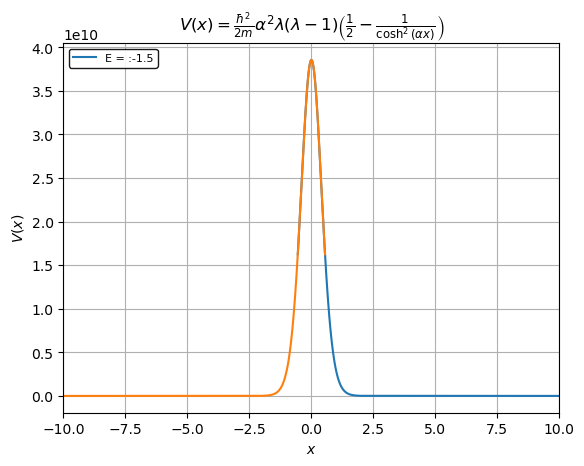

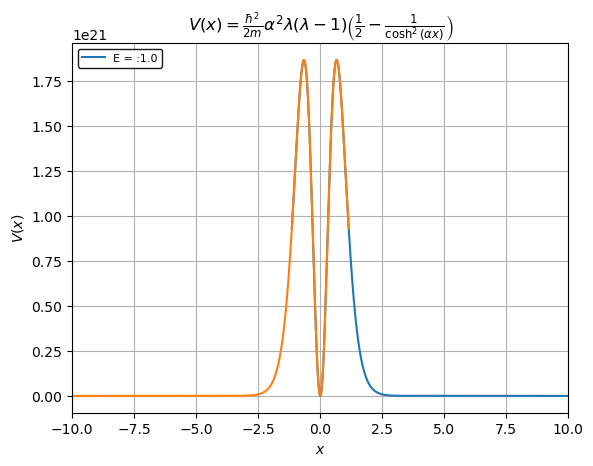

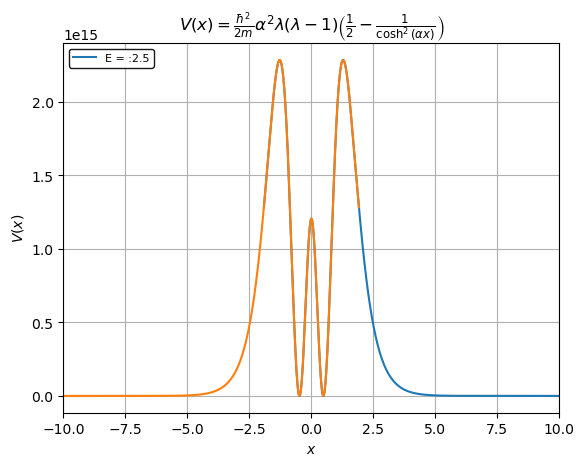

In [896]:
# Numerov method implementation
def numerov(x, dx, E):
    n = len(x) - 2
    psi = np.zeros(n + 2)
    
    # Initial conditions
    psi[0] = 0  # Boundary condition: wavefunction vanishes at -inf
    psi[1] = 1e-10  # Small initial value
    
    # Numerov's method iteration
    for i in range(1, n + 1):
        k2 = -2 * m / hbar**2 * (E - V(x[i]))
        psi[i + 1] = (psi[i] * (2 + 10 / 12 * dx**2 * k2) - 
                      psi[i - 1] * (1 - dx**2 / 12 * k2)) / (1 - dx**2 / 12 * k2)
    
    return psi

# Loop through each set of results
all_wavefunctions_T = []  # To store wavefunctions for all 

for res_idx, res in enumerate(results_T):
    # Extract values from results
    x_left_inf_T = res['x_left_inf']
    x_right_inf_T = res['x_right_inf']
    dx_T = res['dx']
    x_left_turn_T = res['x_left_turn_T']
    x_right_turn_T = res['x_right_turn_T']

    # Calculate the number of points
    n_T2 = int((x_right_turn_T - x_left_inf_T) / dx_T)
    
    # Define x arrays
    x_left_T = np.linspace(x_left_inf_T, x_right_turn_T, n_T2 + 2)
    x_right_T = np.linspace(x_right_inf_T, x_left_turn_T, n_T2 + 2)
    
    # Compute wavefunctions for a specific energy level
    E_T = True_eigenvalues[res_idx % len(True_eigenvalues)]  # Example: cycle through energies
    y_left_T = numerov(x_left_T, dx_T, E_T)
    y_right_T = numerov(x_right_T, dx_T, E_T)

    # square
    y_left_square = y_left_T ** 2
    y_right_square = y_right_T ** 2

    # Store wavefunctions and x values
    all_wavefunctions_T.append({
        'x_left_T': x_left_T,
        'x_right_T': x_right_T,
        'y_left_T': y_left_square,
        'y_right_T': y_right_square,
        'energy_T': E_T
    })

# Debugging: Print or inspect one of the computed wavefunctions
for idx, wf in enumerate(all_wavefunctions_T):
    print(f"Wavefunction set {idx + 1}:")
    print(f"  Energy: {wf['energy_T']:.6f}")
    print(f"  x_left_1: {wf['x_left_T'][-1]} ...")   
    print(f"  x_right_1: {wf['x_right_T'][-1]} ...")  
    print(f"  y_left_1: {wf['y_left_T'][-1]} ...")   
    print(f"  y_right_1: {wf['y_right_T'][-1]} ...")  

for i in range(len(True_eigenvalues)):
    plt.plot(all_wavefunctions_T[i]['x_right_T'], all_wavefunctions_T[i]['y_right_T'], label = f'E = :{True_eigenvalues[i]}')
    plt.plot(all_wavefunctions_T[i]['x_left_T'], all_wavefunctions_T[i]['y_left_T'])
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.title(r'$V(x)=\frac{\hbar^2}{2m} \alpha^2 \lambda(\lambda-1)\left(\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right)$')
    plt.xlabel('$x$')
    plt.ylabel('$V(x)$')
    plt.legend(
        fontsize=8,                   # Set font size
        loc='upper left',             # Place legend in the lower left
        frameon=True,                 # Enable legend box
        framealpha=0.9,               # Make legend box slightly transparent
        edgecolor='black'             # Add black border to the legend box
    )

    plt.show()
